# Введение в обучение с подкреплением - алгоритм Q-обучение

В этом занятии, мы погрузимся в очень интересную сферу искусственного интеллекта, которая известна как *обучение с подкреплением* (reinforcement learning).

Сперва нужно отметить, что тема обучения с подкреплением совсем не новая, и на протяжении много десятилетий она не была ни как связанна с нейронными сетями. Лишь в последнии несколько лет ученные начали масштабно скрещивать алгоритмы обучения с подкреплением и нейронные сети, что открыло новую сферу, известную как **глубокое обучение с подкреплением**. 

Разумеется, мы рассмотрим один из алгоритмов глубокого обучение с подкреплением уже на этом занятии, но сперва нам нужно сначала немного погрузиться в тематику классического обучения с подкреплнием. 

# **Что такое обучение с подкреплением и зачем оно нужно?**

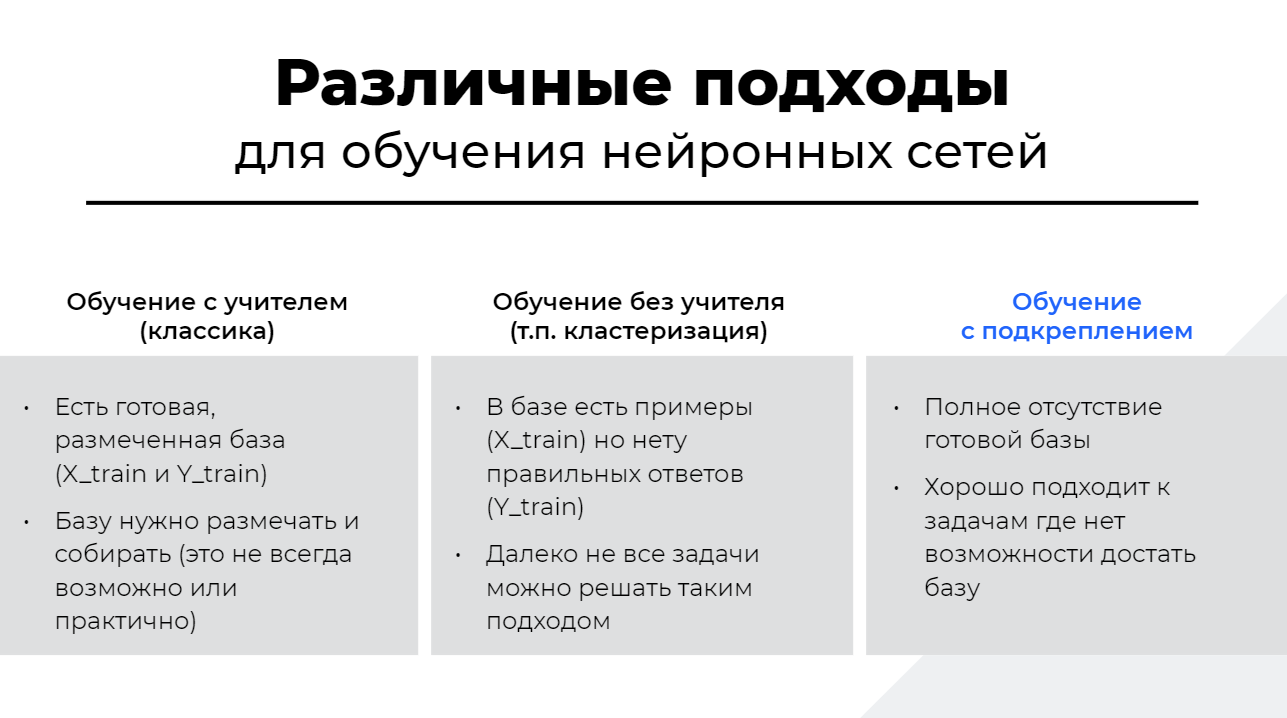

Обучение с подкреплением - это школа алгоритмов искусственного интеллекта, где алгоритмы обучаются решать поставленную задачу **без готовой базы данных**. На самом деле, есть много задач где либо очень сложно, непрактично, или совсем невозможно собрать и разметить классическую базу данных с X_train и Y_train для обучения нейронной сети. Например:

* **Научить робота ходить, хватать вещи, или самостоятельно совершать прочие действия** - нужно отметить, что ИИ не так часто применяется в сфере робототехники, от части из-за того, что наиболее продвинутые алгоритмы ИИ вышли совсем не давно, и их ещё не успели везде применить. Однако, за последние несколько лет были попытки применить ИИ к роботам, что привело к значительному успеху. Самый наглядный плюс применения ИИ в робототехнике заключается в том, что в итоге робот становится гораздо более устойчивым к различным калебаниям (ветер, вибрации, толчки от людей, и тд.) чем роботы, которые совершают действия алгоритмическим путем.

* **Научить автопилот водить машину** - Водить машину алгоритмическим путем - совсем невозможно, по сколько требуется элемент компютерного видение. Однако эту задачу также невозможно решить с классическими методами компьютерного видение, т.к. собрать базу для обучения, которая описывает все возможные сценарии на дороге и что нужно в них делать, просто невозможно - это займет чрезмерно много человеческих ресурсов. Однако, эти проблемы можно хотя бы частично уладить используя обучение с подкреплением.

* **Рекоммендательные системы** - Хоть и различные, относительно примитивные рекоммендательные системы существовали до обучения с подкреплением, и даже до ИИ, практика показывает что самые мощные и способные рекоммендательные системы получаются лишь с применением обучения с подкреплением. Это опять таки происходит из-за того, что создать базу для обучения с нужным размером, которая описывает все возможные виды пользователей и их потребности, просто на практике невозможно.

* **Трейдинг** - Возможно, вы уже сталкивались с трейдингом или с задачами походи на трейдинг на занятиях по временным рядам. Тут может показаться, что достаточно просто создать нейронную сеть, которая будет предсказывать курс акций, и этого достаточно для автоматизированного трейдинга - однако не всё так просто. Полноценные боты для трейдинга способны не просто предсказывать цену акции на один шаг вперед, а составлять сложную стратегию для входа и выхода из сделки. Бывает, что нужно держать акции даже когда цена падает, потому что предпологается что в будущем она вырастит ещё больше. Нужно решать сколько покупать и сколько продавать на каждый момент. Теоретический можно составить огромную базу, на которой можно обучить нейронную сеть граммотно торговать, но опять таки на практике собирать такую базу - совсем неприемлемо сложно и долго.

* **Составление расписания** - Это ещё одна классическая задача, которую на практике можно решить лишь с помощью обучения с подкреплением. Представьте себе, что вы работаете в крупкой компании, и что каждый день или каждую неделю вам нужно составлять расписания для работы сотен работников. При этом, нужно учитывать разные выходные дни, ставки, должности, загруженность работы, и много других параметров. Может быть, это авиакомпания, и нужно учитывать места высадки разных пилотов чтобы, например, капитан рейса Иван мог в конце недели прилитеть в родной город. Составлять такие графики в ручную - очень тяжело и неэффективно, а чтобы обучить алгоритм это делать, нужно иметь огромное количество данных. Опять таки, собирать все эти данные в ручную практический невозможно, по этому в подобных задачах часто используют обучение с подкреплением.

* **Научить бота самостоятельно играть в игры** - как раз этой темой мы и будем в основном заниматься во всех наших занятиях! На текущий момент, алгоритмы ИИ способны обигрывать человека в играх типа шахматы, го, а также в мнгих видеоиграх - однако есть и огромное количество игр, которые могут казаться простыми для человека, но являются чрезмерно сложными даже для самых продвинутых алгоритмов ИИ (например, майнкрафт). Но даже чтобы обучить алгоритм хорошо играть в относительно простые игры, требуется огромная база для обучения. В этой ситуации, собрать такую базу вручную невозможно даже в теории, по сколько база должна говорить алгоритму что нужно делать, чтобы победить - а мы этого сами не знаем. Однако, уже в конце этого занятия мы сможем убедиться, что такую задачу вполне просто решить используя обучение с подкреплением.

Как вы видите, обучение с подкреплением - это по сути просто подход, который мы применяем когда у нас нету готоыой базы данных чтобы научить алгоритм что-то делать. Идея обучить алгоритм без базы возможно звучит очень странно и радикально, по сколько любой алгоритм искусственного интеллекта, разумеется, не сможет ничему научиться без данных.

Здесь нужно отметить, что данные у нас конечно будут, и что алгоритмы обучения с подкреплением обучаются на этих данных также, как и все остальные алгоритмы ИИ. Ключевая разница между классическим ИИ и обучение м подкреплением заключается в том, что в обучении с подкреплением **данные генеряться сами в процессе обучения алгоритма**. Из-за того, что данные генеряться сами, у нас пропадают многие трудности в создании и разметки датасета.

Идея такого подхода заключается в том, что данные генеряться при попытке алгоритма решить поставленную задачу.

Предсатвим пример, что алгоритм пытается научиться побеждать человека в шахматах. В начале своего обучения, алгоритм будет делать что-попало, и соответственно будет проигрывать - но в этом процессе он будет запоминать состояние игровой доски, и ходы которые привели к пройгрышу. Затем, он будет обучаться на этих данных, и начнет понимать какие ходы не стоит делать при заданном состоянии игровой доски. 

Рано или поздно, он сделает что-то, что приведет его ближе к победе (например, взятие ферся противника) - все состояния за несколько ходов до момента взятия ферся, и соответствующие действия которые привели к этому, также сохраняться чтобы алгоритм мог обучиться на них, и придти к пониманию того, что нужно делать. После каждой партии, алгоритм будет иметь больше данных, и после каждой итерации обучения он будет всё лучше играть в шахматы, пока он наконец не начнет подеждать своего соперника.

**Вкратце:** данные для обучения алгоритма генеряться при попытки алгоритма решить свою задачу, что значит алгоритм фактический обучается на своих ошибках и на успехе. По сколько алгоритм обучается на своем опыте, такой подход называется *обучение с подкреплением*.

## Награды

За каждое действие алгоритма выдается награда, которая может быть положительной, отрицательной, либо нулевой. Если действие привело к желаемему результату, или к чему-то что приближает к желаемому результату, как правило выдается положительная награда.

За действия которые приводят к провалу, дальше от желаемого результата, как правило выдается отрилиательная награда - также известно как *наказание*.

За все остальные действия, которые не приводят ни к плохому, ни к хорошему результату, либо когда мы пока ещё не знаем если результат хороший или плохой, обычно выдается нулевая награда.

Очень важно отметить что **логика выдачи наград полностью определяется человеком, при создании алгоритма**. Если снова привести пример с шахматами, логично назначать положительную награду за взятия фигур противника, или когда мы ставим королю мат - а отрицательные, когда мы теряем фигуры или проигрываем игру. Однако, если по какой-то причине мы хотим научить алгоритм проигрывать, можно и  сделать наоборот - назначать положительные награды за проигрыш, и отрицательные за выигрыш. По крайней мере, ни кто нам не запрещает так делать, но в таком случае цель алгоритма будет совсем другой.

Это значит что **награды являются аналогом меток y_train в обучении с подкреплением**. Когда алгоритм совершает нежелаемые действия, мы говорим ему "больше так не делай" используя отрициательную награду, а когда алгоритм делает всё правильно, мы говорим ему "это хороший результат, старайся также делать дальше" используя положительную награду. 

В итоге, алгоритм будет стараться избегать отрициательные награды и добиваться положительных наград - однако нужно отметить что эти награды могут иметь разные величины. Давайте представим, что тот же алгоритм, который учиться играть в шахматы, на один конкретный момент имеет два возможных хода: взять вражеского ферся (награда +1) или поставить мат вражескому королю (награда +10). Что будет делать алгоритм в такой ситуации, где все возможные награды и так положительные? Нужно отметить, что **алгоритм будет всегда принимать действия которые приводят к максимальной возможной награде.**

## Термины, которые нужно изучить

Перед тем, как мы погрузимся в теорию ещё глубже, нам нужно сначала разобраться с терминологией. 

* **Агент** это часть среды, чьи действия полностью контролируется искусственным интеллектом. Если алгоритм играет в шахматы, агент это сторона (белые или черные), за которую играет алгоритм. Если речь идёт о стрелялке, тогда агент - это игрок, чьи действия контролирует нейронная сеть. Если задача заключается в хождении робота, агентом будет являться сам робот и все части тела, которыми он может управлять.

* Агент свегда взаимодействует с **средой**, в которой он находиться. Среда - это всё на что агент может повлиять не прямым путем. Например, если речь идёт о шахматах, средой будет игровая доска и расположение всех фигур на доске - т.к. нейронная сеть не может ходить фигурами другой стороны, но может на них повлиять ходя своими фигурами (например, мжет взять фигуру, поставить шах, и т.д.) В примере с стрелялкой, средой является вся область вокруг игрока, расположение врагов/других игроков, и тд. В примере с роботом, средой будет являться физическое пространство в котором он находиться, объекты которые он должен схватить, и т.д.

* **Награда** - это скалярное значение, которое назначается за каждое действие агента. Награда назначается в соответствии с тем, что происходит внутри среды. Нужно отметить, что в идеале награды должны быть всегда на прямую связанны с действиям агента, однако в более сложных средах где задача которую должен решить алгоритм является более сложной, расставить награды таким образом не всегда возможно.

* После каждого действия агента, среда переходит в новое **состояние**. Состояние - это текущий расклад всего, что находиться внутри среды. Если алгоритм играет в шахматы и обе стороны сделали свой ход, игровая доска переходит в новое состояние. Если алгоритм играет в стрелялку и он потратил один патрон чтобы сделать выстрел, среда переходит в новое состояние. Когда что-то меняется в среде, среда нереходит в новое состояние.

* **Значение состояния** - это скалярное число, которая описывает на сколько текущее состояние "хорошое" и какие награды можно ожидать за различные действия в ближайшем будующем. Математический, значение состояния выражается как **V(s)** - где s это текущее состояние (state). Не волнуйтесь если этот термин пока-что кажется немного смутным - это действительно немного абстрактное понятие, и мы скоро рассмотрим его на более глубоком уровне.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from IPython.display import clear_output
import time
sns.set_style('darkgrid')

Сначала, нам нужно написать код для создания среды, агента, а также правила по которым агент может взаимодействовать с средой. 



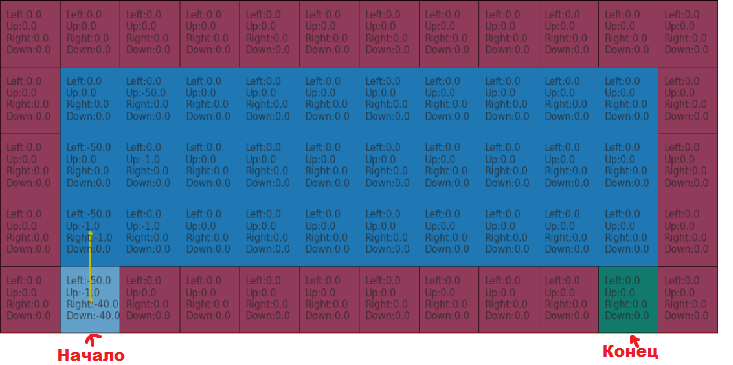

Агент может двигаться с любой синей ячейки влево, вправо, вверх, или вниз. Его цель - пройти с начальной ячейки до конечной, и при этом не попадать на фиолетовые ячейки. Игра заканчивается выйгрышем при попадании на конечную ячейку, либо проигрышем при попадании на любую из фиолетовых. Также желательно пройти до финиша кротчайщим возможным путём.

Путь, который прошёл наш агент, размечается жёлтой линией.

Эта задача очень простая, и количество возможных, уникальных состояний здесь немного. По этому задача является демонстративной (с её помощью покажем суть основного алгоритма Q-learning), и её можно решить без применение нейронных сетей.

In [ ]:
#Здесь содержиться весь нужный кож для создания среды.


#Назначаем награду в -50 очков за попадание в плохую ячейку, 
#-1 за обычный шаг (это нужно чтобы находить кротчайший путь, 
#и +10 очков когда агент попадает в финальную ячейку)
points = [-50, -1, 10]

step = ([[-1, 0], [0, 1], [1, 0], [0, -1]]) #Двигаться влево, вправо, вверх, и вниз.
kf_rewards = 0.99 # коэффициент учета будующих награждений 
epsilon = 1.0 # параметр случайного хода Epsilon Greedy
rewards = np.zeros((5,13,4)) # матрица наград игрового поля (Q-таблица) 
start_position = np.array([1,0]) # стартовая позиция
finish_position = np.array([10,0]) # финишная позиция
rewards[start_position[1],start_position[0]] = points[0]+10 # Начальные награды в стартовой точнке (инициализируем как -40 что бы ускорить обучение)
        
# Функция создания игрового поля
def createField(): 
  fig, ax = plt.subplots(1, figsize=(24, 10)) # Создаем полотно
  rect = patches.Rectangle((0, 5), 12, -5, linewidth = 2, edgecolor = 'black') # Создаем прямоугольник вокруг всего игрового поля
  ax.add_patch(rect) # Рисуем прямоугльник
  rect = patches.Rectangle((1,1), 1, -1, linewidth = 1, edgecolor = 'black', facecolor = 'white', alpha = 0.3) # Создаем прямоугльник стартовой позиции
  ax.add_patch(rect) ## Рисуем прямоугльник        
        # Рисуем "опасные" прямоугольники по границе игрового поля
  for i in range(2,10):
    rect = patches.Rectangle((i,1), 1, -1, linewidth = 1, edgecolor = 'black', facecolor = 'red', alpha = 0.5)
    ax.add_patch(rect)
  for i in range(1,12):
    rect = patches.Rectangle((i,5), 1, -1, linewidth = 1, edgecolor = 'black', facecolor = 'red', alpha = 0.5)
    ax.add_patch(rect)
  for i in range(1, 6):
    rect = patches.Rectangle((0,i), 1, -1, linewidth = 1, edgecolor = 'black', facecolor = 'red', alpha = 0.5)
    ax.add_patch(rect)
  for i in range(1, 5):
    rect = patches.Rectangle((11,i), 1, -1, linewidth = 1, edgecolor = 'black', facecolor = 'red', alpha = 0.5)
    ax.add_patch(rect)        
  rect = patches.Rectangle((10,1), 1, -1, linewidth = 1, edgecolor = 'black', facecolor = 'green', alpha = 0.4) # Создаем прямоугльник финишной позиции
  ax.add_patch(rect) # Рисуем прямоугльник
  plt.xticks(np.arange(13))
  plt.yticks(np.arange(6))
  return fig,ax
    
# Функция получения случайного хода
def GetNextRandomPosition(current_position, positions):        
  while True:
    idx = np.random.randint(4) # Генерируем случайное значение (0,1,2,3)
    next_position = current_position + step[idx] # Получаем новое положение
              
    # Если награда за движение в указанную точку не равна минимальное (означает, что двигаемся в "опасную" точку)
    if rewards[current_position[1], current_position[0], idx] != points[0]:
      # Если не вышли за границу игрового поля
      if next_position.min() >= 0 and next_position[1] < 5 and next_position[0] < 12:
        # Если это не первый шаг
        if len(positions)>1:
          # Если не делаем шаг назад
          if list(next_position) != positions[-2]:                            
            return next_position
        else:
          return next_position

# Функция: сыграть одну партию
def playGame(num):
  global epsilon

  clear_output(wait = True) # очищаем экран  
  current_position = start_position # Текущая позиция равна стартовой
  positions = [list(start_position)] # В список позиций записываем стартовую позицию
  while True:                
    f,a = createField() # Создаем игровое поле
    # Генерируем случайное значение от 0 до 1. И если оно меньше текущего значения epsilon
    if np.random.random() < epsilon:
      # Делаем случайный шаг
      next_position = GetNextRandomPosition(current_position, positions)
    # В противном случае
    else:                
      re = np.argmax(rewards[current_position[1], current_position[0]]) # Получаем максимальное вознаграждение из текущей позиции
      next_position = current_position + step[re] # Делаем шаг по пути максимального вознаграждения
      # Если вышли за пределы игрового поля
      if next_position.min() < 0 or next_position[1] > 4 or next_position[0] > 11:
        #то перезаписываем новое положение на случайное
        next_position = GetNextRandomPosition(current_position, positions)                    
                # Если это не первый шаг
        if len(positions) > 1:
          # Если сделали шаг назад
          if list(next_position) == positions[-2]:
            # Перезаписываем новое положение на случайное
            next_position = GetNextRandomPosition(current_position, positions)
    # Если epsilon больше 0.01
    if epsilon > 0.01:
      epsilon *= 0.999 # Изменяем значение (экспоненциальный спад epsilon)  
    positions.append(list(next_position)) # Добавляем в список позиций новое положение агента
    # Визуализируем путь игрока желтыми линиями
    for p in range(len(positions)-2):
      x = [positions[p][0] + 0.5, positions[p+1][0] + 0.5]
      y = [positions[p][1] + 0.5, positions[p+1][1] + 0.5]
      a.plot(x, y, marker = 'o', color = 'y', linewidth = 4)            
    # Последний шаг рисуем зелёной линией
    x = [positions[-2][0] + 0.5, positions[-1][0] + 0.5]
    y = [positions[-2][1] + 0.5, positions[-1][1] + 0.5]
    a.plot(x, y, marker = 'o', color = 'g', linewidth = 4)
            
    # Печатаем текстовую информацию (награды в каждой ячейке игрового поля)
    for i in range(5):
      for j in range(12):
        txt = 'Left:' + str(round(rewards[i,j,0], 2)) + '\n' +\
          'Up:' + str(round(rewards[i,j,1], 2)) + '\n' +\
          'Right:' + str(round(rewards[i,j,2], 2)) + '\n' +\
          'Down:' + str(round(rewards[i,j,3], 2))                
        a.text(j + 0.1, i + 0.2, txt, fontsize = 16, alpha = 0.7) 
    plt.title(f"Игра № {num + 1}:", fontsize = 16)
    plt.show()
            
    current_position = next_position # Перезаписываем текущее положение
    clear_output(wait = True) # Очищаем экран
            
    # Если попали в "опасную" точку или дошли до финиша
    if next_position[1] == 0 or next_position[1] == 4 or next_position[0] == 0 or next_position[0] == 11:
      break # Выходим из цикла 
  return positions # Возврщаем список позиций
    
def train(count = 20, auto = True):
  global rewards

  for num in range(count): #В каждой партии
    positions = playGame(num) #Играем партию и записываем позиции что бы посчитать награды
    f,a = createField() #Создаем игровое поля
              
    for p in range(len(positions) - 1): #Рисуем пройденный путь агента
      x = [positions[p][0] + 0.5, positions[p+1][0] + 0.5]
      y = [positions[p][1] + 0.5, positions[p+1][1] + 0.5]
      a.plot(x, y, marker = 'o', color = 'y', linewidth=4)
              
      action = step.index(list(np.array(positions[-1]) - np.array(positions[-2])))
      rew = points[0] #Извлекаем награды за действие
      if positions[-1] == list(finish_position): #Если достигли финишную клетку
        rew = points[2] #Награждаем 10 очков
      rewards[positions[-2][1],positions[-2][0]][action] = rew #Обновляем матрицу наград
      y = 1
      if len(positions)>2: #Если совершили больше чем 2 шага
        for i in range(len(positions)-3, -1, -1): #Считаем награды для всех клеток, начиная с последней
          action = step.index(list(np.array(positions[i+1]) - np.array(positions[i])))
          ###ВАЖНОЕ###
          #Рекурсивное уравнение Бэллмена в коде
          rewards[positions[i][1],positions[i][0]][action] = points[1] + y * max(rewards[positions[i+1][1],positions[i+1][0]]) #Штрафуем за 1 очко на наждый шаг, прибавляем награжу за следующий шаг
          ###############
        y *= kf_rewards #Скалируем награды в соответствии kf_rewards
      for i in range(5):
        for j in range(12): #Записываем вычисленную Q-таблицу
          txt = 'Left:'+str(round(rewards[i,j,0],2))+'\n'+\
            'Up:'+str(round(rewards[i,j,1],2))+'\n'+\
            'Right:'+str(round(rewards[i,j,2],2))+'\n'+\
            'Down:'+str(round(rewards[i,j,3],2))                
          a.text(j+0.1, i+0.2, txt, fontsize=16, alpha = 0.7)      
      plt.show()
      clear_output(wait=True) # Очищаем экран

# Обучаем алгоритм

In [ ]:
#Обучаем агента на 1000 игр, смотрим как он обучается.
position = train(1000)

KeyboardInterrupt: ignored

# Тестируем обученный алгоритм.

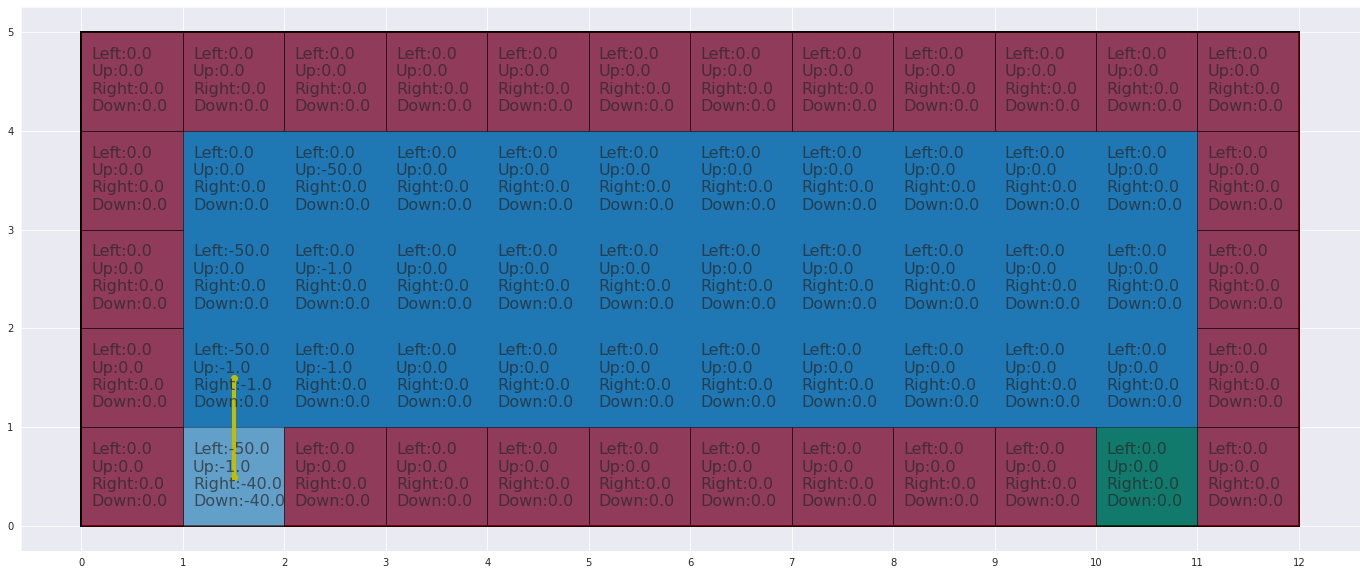

In [ ]:
#Тестируем результат (ставим нулевое значение параметру epsilon)
epsilon = 0
position = train(1)